# Titanic : Machine Learning from a disaster

**1. Importing libraries**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


**2. Reading the data**

In [3]:
train_df= pd.read_csv("archive/train.csv")
test_df=pd.read_csv("archive/test.csv")

In [4]:
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
print(train_df.columns)
print(test_df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [7]:
train_types = train_df.dtypes
numerical_values = train_types[(train_types==float)]
print('The following are numerical features')
print(numerical_values)

The following are numerical features
Age     float64
Fare    float64
dtype: object



**Numerical Features**

*     Age: indicates age of passenger
*     Fare : indicates fare paid by that passenger




**Categorical Features**

*     Survived: Indicates that if particular passenger survived(1) or not(0)
*     Pclass: Shows classes for the passenger, 1 for first, 2 for second and 3 for third.
*     Sex: Indicates gender of the passenger. Might be crucial indicator for our model since historical records show women were first to save in ship accidents.
*     SibSp: The number of siblings and spouses on the ship, might be useful for extracting family ties.
*     Parch: The number of parents and children on the ship, migt have similar use with SibSp.
*     Embarked: Flag for the where the passenger embarked from, C for Cherbourg, Q for Queenstown, S for Southampton



In [8]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Checking the null values

# **3. Data Cleaning and Preparation**

In [9]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


null values in the train and test data frames

*     Age
*     Cabin
 


We are dropping the Cabin and Ticket values from the train and test data frames are they are of no significance.

In [11]:
train_df.drop(labels = ['Cabin','Ticket'],axis = 1,inplace = True)

In [12]:
test_df.drop(labels = ['Cabin','Ticket'],axis = 1,inplace = True)

Let us check the missing values in the train and test dataframes.

In [13]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [14]:
test_df.isna().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

The median will be an acceptable value to place in the NaN cells

In [15]:
train_df["Age"].fillna(train_df["Age"].median(), inplace = True)
test_df["Age"].fillna(test_df["Age"].median(), inplace = True) 

In [16]:
train_df["Embarked"].fillna("S", inplace = True)              # replacing the value by 'S' as it corresponds to maximum count
test_df["Fare"].fillna(test_df["Fare"].median(), inplace = True)

# 4. Data Visualization

Checking the distribution of age

In [17]:
test_copy = test_df.copy()
test_copy.dropna(inplace = True)

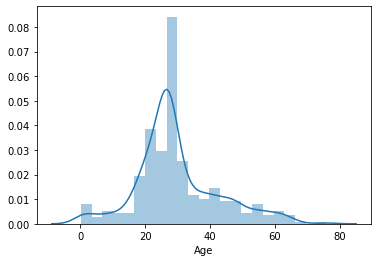

In [18]:
sns.distplot(test_copy['Age'])

From the distribution, it seems that most of the passengers were young. 

Counting the number of flags.

In [19]:
train_df['Embarked'].count()

891

In [20]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [21]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


Checking the survival rate on the category Gender


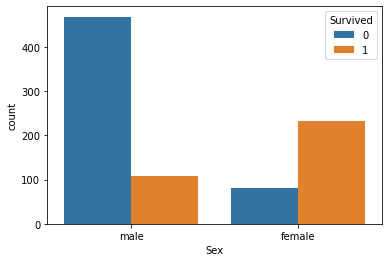

In [22]:
sns.countplot('Sex', hue='Survived', data=train_df)

In [23]:
# Analysing the number of survived passengers
total_survived_females = train_df[train_df.Sex == "female"]["Survived"].sum()
total_survived_males = train_df[train_df.Sex == "male"]["Survived"].sum()

print("Total people survived is: " + str((total_survived_females + total_survived_males)))
print("Proportion of Females who survived:") 
print(total_survived_females/(total_survived_females + total_survived_males))
print("Proportion of Males who survived:")
print(total_survived_males/(total_survived_females + total_survived_males))



Total people survived is: 342
Proportion of Females who survived:
0.6812865497076024
Proportion of Males who survived:
0.31871345029239767


 68 percent of women survived in the accident compared to 32 % men

Checking the survival rate based on the 'Class' category.

In [24]:
class_one_survived = train_df[train_df.Pclass == 1]['Survived'].sum()
class_two_survived = train_df[train_df.Pclass == 2]['Survived'].sum()
class_three_survived = train_df[train_df.Pclass == 3]['Survived'].sum()
total_survived = class_one_survived + class_two_survived + class_three_survived 

print('Total number of people who survived is ' +str(total_survived))

Total number of people who survived is 342


In [25]:
print("Proportion of Class 1 Passengers who survived:") 
print(class_one_survived/total_survived)
print("Proportion of Class 2 Passengers who survived:")
print(class_two_survived/total_survived)
print("Proportion of Class 3 Passengers who survived:")
print(class_three_survived/total_survived)

Proportion of Class 1 Passengers who survived:
0.39766081871345027
Proportion of Class 2 Passengers who survived:
0.2543859649122807
Proportion of Class 3 Passengers who survived:
0.347953216374269


From the results it can be seen that first class passengers survived the most.

Visualising the survival rates based on Gender and Class.

Text(0.5, 1.0, 'Survival Rates Based on Gender and Class')

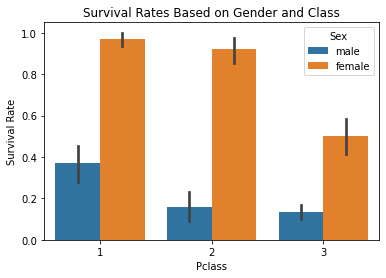

In [26]:
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=train_df)
plt.ylabel("Survival Rate")
plt.title("Survival Rates Based on Gender and Class")

Text(0.5, 1.0, 'Survival Rates Based on Gender and Class')

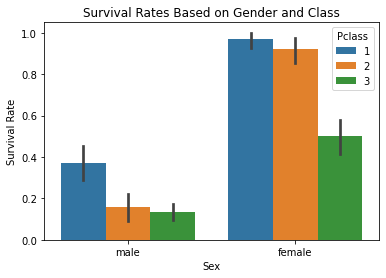

In [27]:
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=train_df)
plt.ylabel("Survival Rate")
plt.title("Survival Rates Based on Gender and Class")

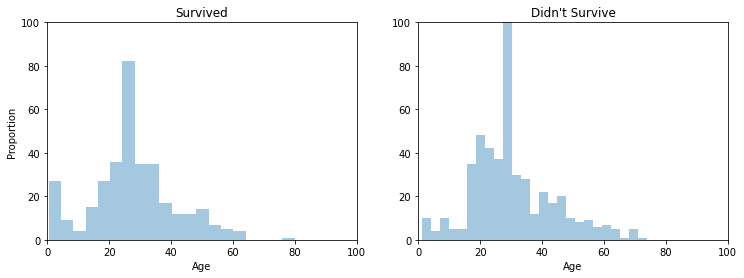

In [28]:
survived_ages = train_df[train_df.Survived == 1]["Age"]
not_survived_ages = train_df[train_df.Survived == 0]["Age"]
plt.subplot(1, 2, 1)
sns.distplot(survived_ages, kde=False)
plt.axis([0, 100, 0, 100])
plt.title("Survived")
plt.ylabel("Proportion")
plt.subplot(1, 2, 2)
sns.distplot(not_survived_ages, kde=False)
plt.axis([0, 100, 0, 100])
plt.title("Didn't Survive")
plt.subplots_adjust(right=1.7)
plt.show()



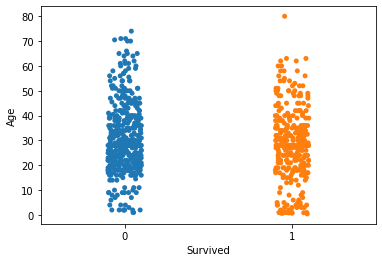

In [29]:
sns.stripplot(x="Survived", y="Age", data=train_df, jitter=True)

It appears as though passengers in the younger range of ages were more likely to survive than those in the older range of ages, as seen by the clustering in the strip plot,as well as the survival distributions of the histogram.


Here is one final cumulative graph of a pair plot that shows the relations between all of the different features.



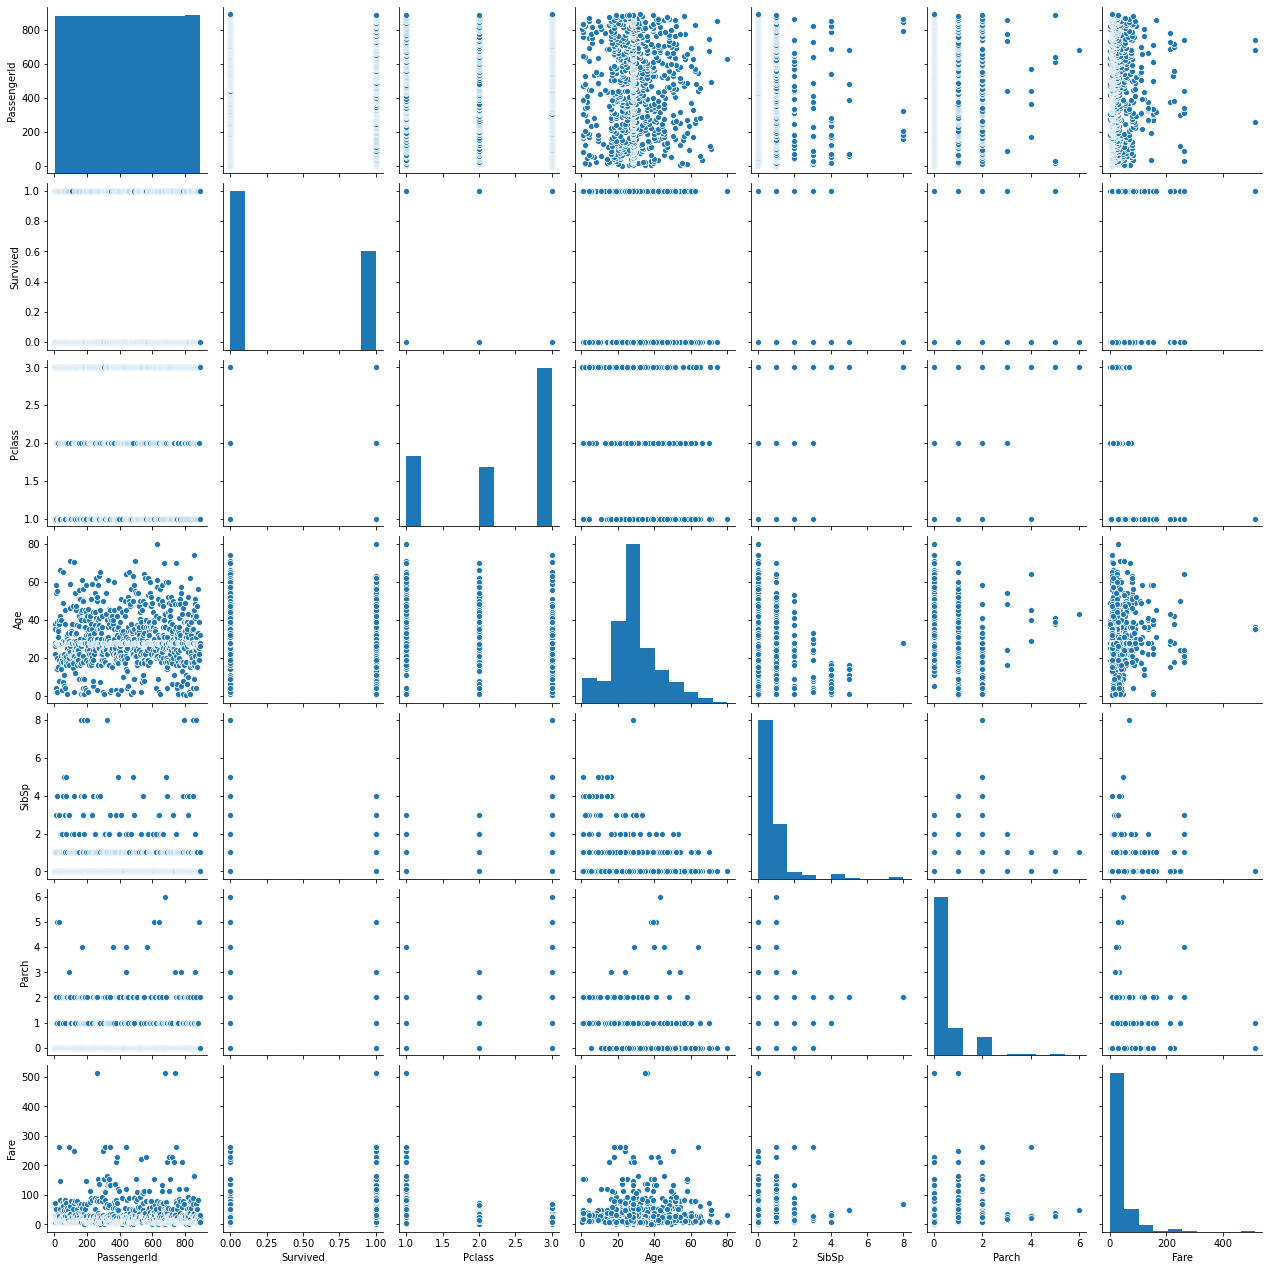

In [30]:
sns.pairplot(train_df)

**Encoding the categorical values**

In [31]:

from sklearn.preprocessing import LabelEncoder

le_sex = LabelEncoder()
sex_encoded = le_sex.fit_transform(train_df["Sex"])
train_df['Sex'] = sex_encoded
train_df.head()

le_embarked = LabelEncoder()
embarked_encoded = le_embarked.fit_transform(train_df["Embarked"])
train_df['Embarked'] = embarked_encoded

train_df.head()




,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,2


In [32]:
from sklearn.preprocessing import LabelEncoder

le_sex_test = LabelEncoder()
sex_encoded_test= le_sex_test.fit_transform(test_df["Sex"])
test_df['Sex'] = sex_encoded_test

le_embarked_test = LabelEncoder()
embarked_encoded_test = le_embarked_test.fit_transform(test_df["Embarked"])
test_df['Embarked'] = embarked_encoded_test

test_df.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,7.8292,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,7.0000,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,9.6875,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,8.6625,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,12.2875,2


We can combine SibSp and Parch into one synthetic feature called family size, which indicates the total number of family members on board for each member.

In [33]:
train_df["FamSize"] = train_df["SibSp"] + train_df["Parch"] + 1
test_df["FamSize"] = test_df["SibSp"] + test_df["Parch"] + 1

This IsAlone feature also may work well with the data we're dealing with,telling us whether the passenger was along or not on the ship.

In [34]:
train_df["IsAlone"] = train_df.FamSize.apply(lambda x: 1 if x == 1 else 0)
test_df["IsAlone"] = test_df.FamSize.apply(lambda x: 1 if x == 1 else 0)

In [35]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,2,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,2,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,2,2,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,2,1,1


In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#We need to reshape our data since the Scaler takes in arrays
ages_train = np.array(train_df["Age"]).reshape(-1, 1)
fares_train = np.array(train_df["Fare"]).reshape(-1, 1)
ages_test = np.array(test_df["Age"]).reshape(-1, 1)
fares_test = np.array(test_df["Fare"]).reshape(-1, 1)

train_df["Age"] = scaler.fit_transform(ages_train)
train_df["Fare"] = scaler.fit_transform(fares_train)
test_df["Age"] = scaler.fit_transform(ages_test)
test_df["Fare"] = scaler.fit_transform(fares_test)

In [37]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",1,-0.565736,1,0,-0.502445,2,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.663861,1,0,0.786845,0,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,-0.258337,0,0,-0.488854,2,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.433312,1,0,0.420730,2,2,0
4,5,0,3,"Allen, Mr. William Henry",1,0.433312,0,0,-0.486337,2,1,1


Splitting the dataset into train and test dataframes.

# **skLearn module to test**

In [38]:
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, accuracy_score 
from sklearn.model_selection import GridSearchCV


In [39]:
X_train = train_df.drop(labels=["PassengerId", "Survived"], axis=1) #define training features set
y_train = train_df["Survived"] #define training label set
X_test = test_df.drop(labels="PassengerId",axis=1) #define testing features set
#we don't have y_test, that is what we're trying to predict with our model



In [40]:
X_train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,IsAlone
0,3,"Braund, Mr. Owen Harris",1,-0.565736,1,0,-0.502445,2,2,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.663861,1,0,0.786845,0,2,0
2,3,"Heikkinen, Miss. Laina",0,-0.258337,0,0,-0.488854,2,1,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.433312,1,0,0.420730,2,2,0
4,3,"Allen, Mr. William Henry",1,0.433312,0,0,-0.486337,2,1,1


In [41]:
X_train = train_df.drop(labels=["PassengerId", "Survived","Name"], axis=1) #define training features set
y_train = train_df["Survived"] #define training label set
X_test = test_df.drop(labels=["PassengerId","Name"], axis=1)

In [42]:
from sklearn.model_selection import train_test_split #to create validation data set

X_training, X_valid, y_training, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0) 

# **SVC Model**

In [43]:
svc_clf = SVC() 

parameters_svc = {"kernel": ["rbf", "linear"], "probability": [True, False], "verbose": [True, False]}

grid_svc = GridSearchCV(svc_clf, parameters_svc, scoring=make_scorer(accuracy_score))
grid_svc.fit(X_training, y_training)

svc_clf = grid_svc.best_estimator_

svc_clf.fit(X_training, y_training)
pred_svc = svc_clf.predict(X_valid)
acc_svc = accuracy_score(y_valid, pred_svc)

print("The Score for SVC is: " + str(acc_svc))



[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]The Score for SVC is: 0.8100558659217877


# RandomForest Model# 

In [44]:


rf_clf = RandomForestClassifier()

parameters_rf = {"n_estimators": [4, 5, 6, 7, 8, 9, 10, 15], "criterion": ["gini", "entropy"], "max_features": ["auto", "sqrt", "log2"], 
                 "max_depth": [2, 3, 5, 10], "min_samples_split": [2, 3, 5, 10]}

grid_rf = GridSearchCV(rf_clf, parameters_rf, scoring=make_scorer(accuracy_score))
grid_rf.fit(X_training, y_training)

rf_clf = grid_rf.best_estimator_

rf_clf.fit(X_training, y_training)
pred_rf = rf_clf.predict(X_valid)
acc_rf = accuracy_score(y_valid, pred_rf)

print("The Score for Random Forest is: " + str(acc_rf))



The Score for Random Forest is: 0.8156424581005587


# Linear SVC model

In [45]:


linsvc_clf = LinearSVC()

parameters_linsvc = {"multi_class": ["ovr", "crammer_singer"], "fit_intercept": [True, False], "max_iter": [500,1000,1500,2000]}

grid_linsvc = GridSearchCV(linsvc_clf, parameters_linsvc, scoring=make_scorer(accuracy_score))
grid_linsvc.fit(X_training, y_training)

linsvc_clf = grid_linsvc.best_estimator_

linsvc_clf.fit(X_training, y_training)
pred_linsvc = linsvc_clf.predict(X_valid)
acc_linsvc = accuracy_score(y_valid, pred_linsvc)

print("The Score for LinearSVC is: " + str(acc_linsvc))



The Score for LinearSVC is: 0.7932960893854749




# LogisiticRegression Model# 

In [46]:


logreg_clf = LogisticRegression()

parameters_logreg = {"penalty": ["l2"], "fit_intercept": [True, False], "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
                     "max_iter": [50, 100, 200], "warm_start": [True, False]}

grid_logreg = GridSearchCV(logreg_clf, parameters_logreg, scoring=make_scorer(accuracy_score))
grid_logreg.fit(X_training, y_training)

logreg_clf = grid_logreg.best_estimator_

logreg_clf.fit(X_training, y_training)
pred_logreg = logreg_clf.predict(X_valid)
acc_logreg = accuracy_score(y_valid, pred_logreg)

print("The Score for Logistic Regression is: " + str(acc_logreg))



The Score for Logistic Regression is: 0.7877094972067039


Evaluating the model perfomance

In [47]:
model_performance = pd.DataFrame({
    "Model": ["SVC", "Linear SVC", "Random Forest", 
              "Logistic Regression"],
    "Accuracy": [acc_svc, acc_linsvc, acc_rf, 
              acc_logreg]
})

model_performance.sort_values(by="Accuracy", ascending=False)


,Model,Accuracy
2,Random Forest,0.815642
0,SVC,0.810056
1,Linear SVC,0.793296
3,Logistic Regression,0.787709


Random Forest model seems to have the highest performance.

In [48]:
rf_clf.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                       min_samples_split=10, n_estimators=10)

In [49]:
y_pred = rf_clf.predict(X_test)


In [50]:
df_pred = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": y_pred
    })

print(df_pred.shape)



(418, 2)
